![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 4: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-11-07)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/DSF_WEEK_4_EXERCISES.ipynb)

# Exercise 1: dispersion plots [OBLIGATORY]

1. Load the `holy_grail.txt` dataset and create a dictionary of names and indexes like `{"NAME": [1, 2, 5, 10, ...]}` to store when does each NOUN appears among the 5 most frequent ones.
3. Visualize in the same graph the appearances of the top 5 characters to compare them.
4. **OPTIONAL**: Try the same exercise with [this file in the GitHub repo](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/pride_and_prejudice.txt)

In [13]:
#Importing the language
from spacy import load

nlp = load("en")

In [14]:
#Calling the text and splitting it into tokens
holy_grail = nlp(open("data/holy_grail.txt", 'r').read())

In [15]:
#Creating a list with the most common nouns excluding stop_words list
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

char_counter = Counter()

for token in holy_grail:
    if token.pos_ == 'NOUN' and token.text not in STOP_WORDS and token.text != '#':
        char_counter[token.text] += 1

In [16]:
#displaying the top 5 common nouns
char_counter.most_common(5)

[('boom', 42), ('witch', 37), ('music', 29), ('clop', 26), ('singing', 26)]

In [17]:
#splitting the list into names and _ is the quantity of each
names, _ = zip(*char_counter.most_common(5))

In [18]:
from collections import defaultdict

import matplotlib.pyplot as plt

In [19]:
#goig token by token, if that token(noun) is in my list of top nouns, add it to a list
indexes = defaultdict(list)

for token in holy_grail:
    if token.text in names:
        indexes[token.text].append(token.i)

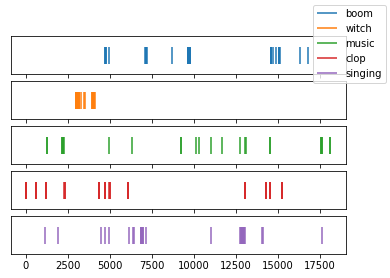

In [20]:
#plotting the distribution of the top 5 common nouns
fig, axes = plt.subplots(5, sharex=True)

for ii, name in enumerate(names):
    axes[ii].eventplot(indexes[name], label=name, color="C{}".format(ii))
    axes[ii].get_yaxis().set_visible(False)

fig.legend()

# Exercise 2: clustering words [OBLIGATORY]

Generate a scatter plot with the distance of the words in [this file](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/1-1000.txt). Load it correctly, beware not to load it as html! Use either PCA or t-SNE to cluster the words, play with different language models. For extra points, find the way to annotate the labels without clustering them, using arrows for instance. [Hint](https://stackoverflow.com/questions/40021676/pyplot-label-scatter-plot-with-coincident-points-overlapping-annotations).

In [40]:
### Using t-SNE ###
import numpy as np
import spacy
from sklearn.manifold import TSNE
import pandas as pd

# Loading the language
nlp = spacy.load("en")

# Reading file
words = open('data/1-1000.txt', 'r').read()

# Making the file into tokens
word_tokens = nlp(words)

# Making a list with all the words that has a vector
l = []
for token in word_tokens:
    if token.is_space:
        pass
    elif token.has_vector:
        l.append(token.text)
        
# Enlisting the vectors for each word
word_vectors = np.vstack([word.vector for word in word_tokens if word.has_vector and not word.is_space])

#Run a PCA of 2 components
tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=1)
word_vecs_tsne = tsne.fit_transform(word_vectors)

# Joining my list of words with its vector
word_vecs_tsne = np.c_[l, word_vecs_tsne]

## NOT SURE WHAT THIS PART DOES ##
component_1_tsne = [float(x) for x in word_vecs_tsne[:, 1]]
component_2_tsne = [float(x) for x in word_vecs_tsne[:, 2]]
distance = [float(x)-float(y) for x, y in zip(word_vecs_tsne[:, 1], word_vecs_tsne[:, 2])]



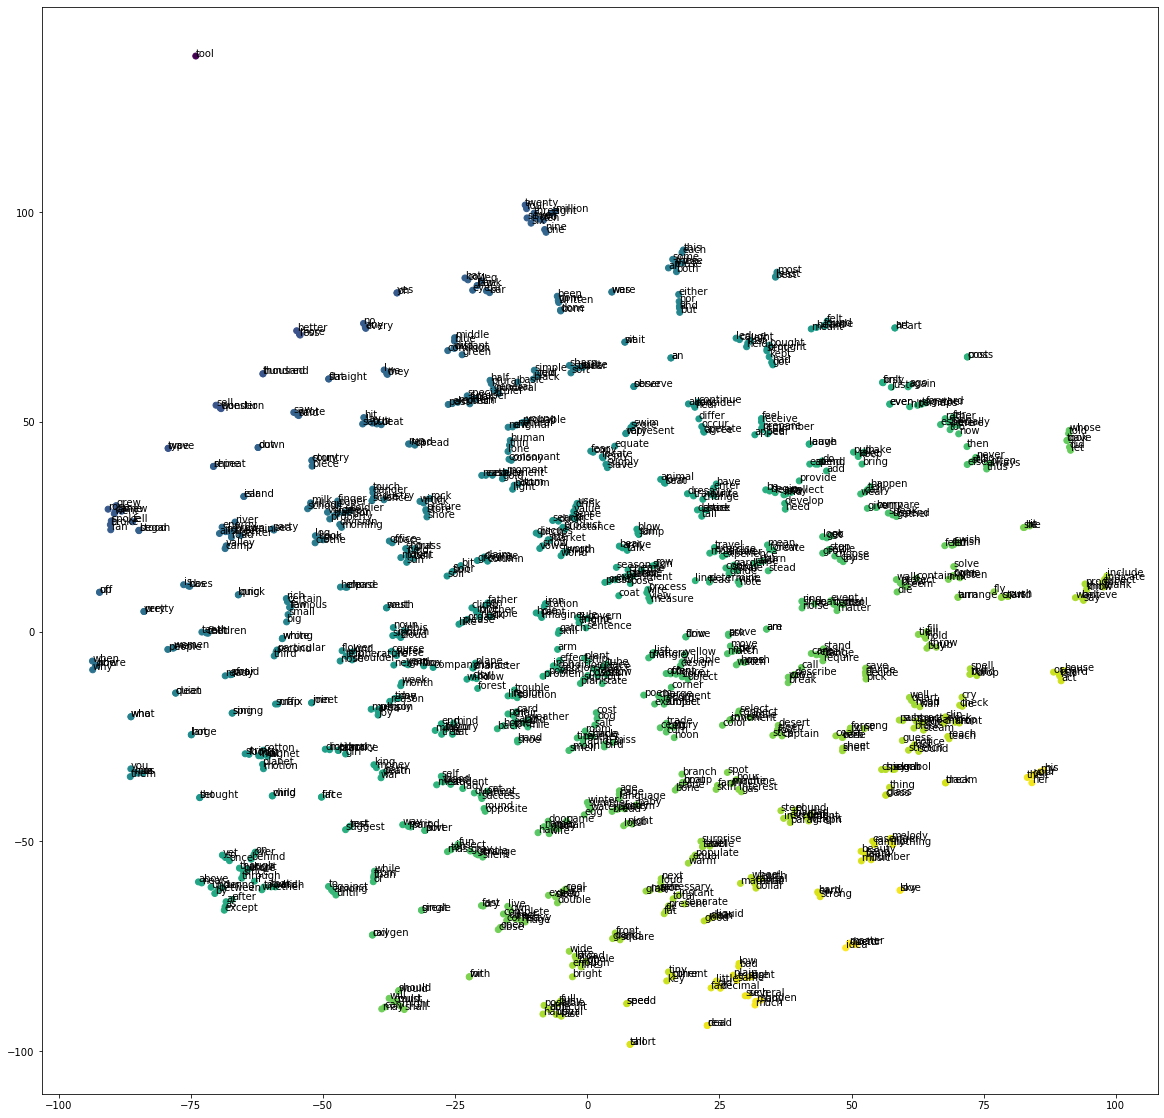

In [39]:
# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(component_1_tsne, component_2_tsne, c=distance)

for i, txt in enumerate(word_vecs_tsne[:, 0]):
    ax.annotate(txt, (component_1_tsne[i], component_2_tsne[i]))

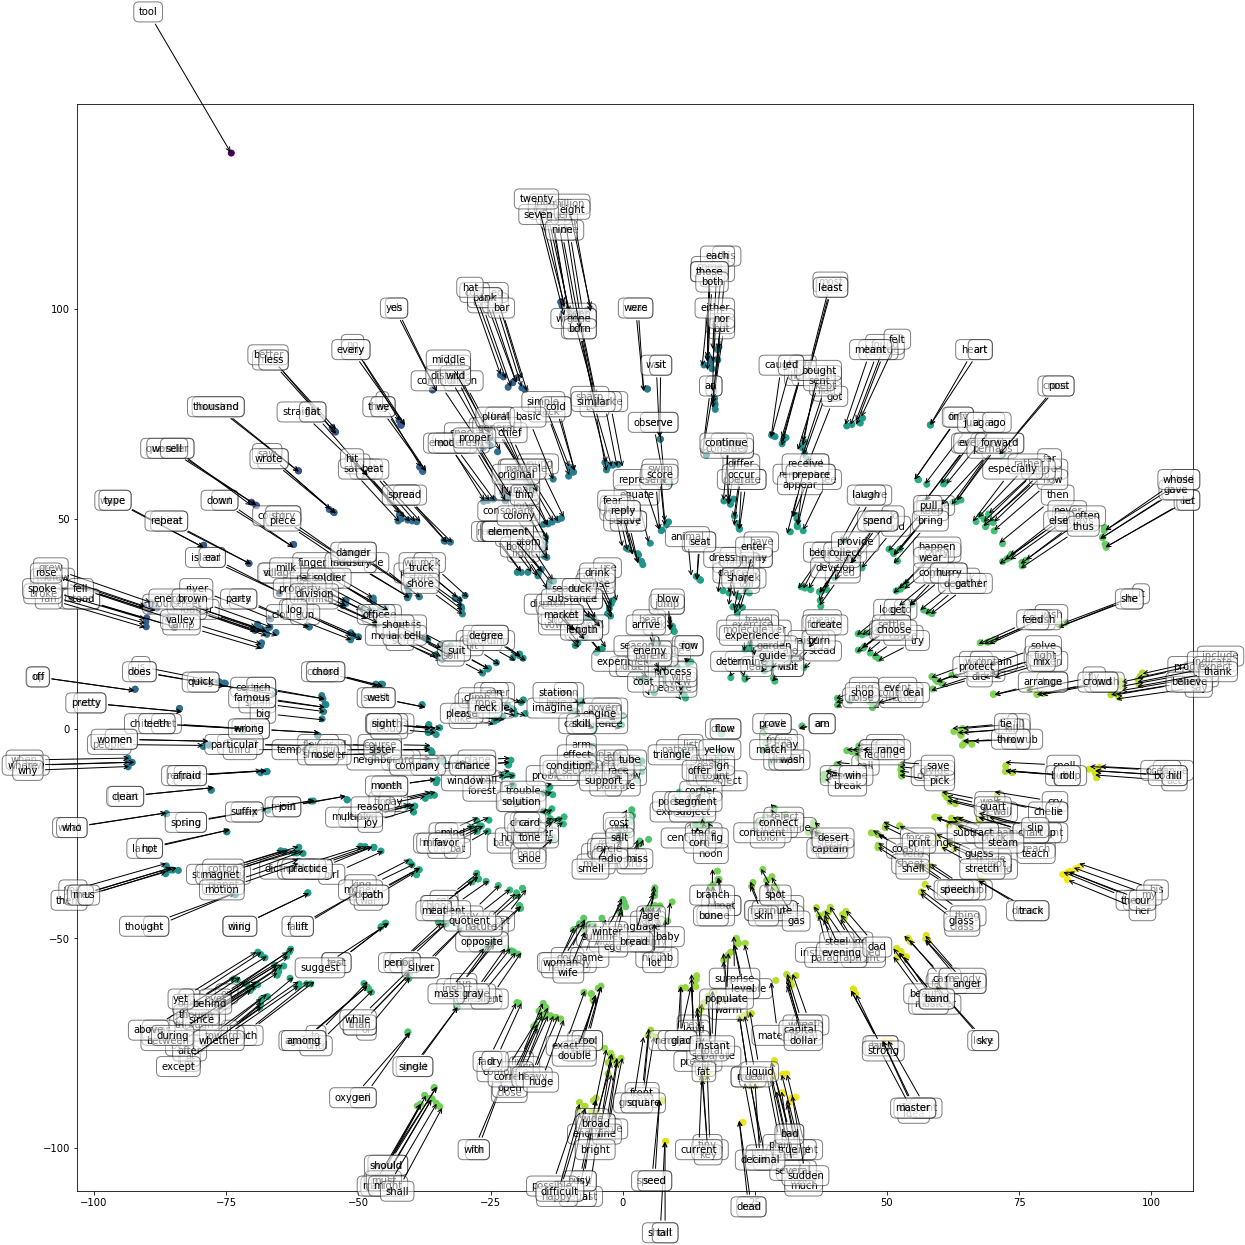

In [95]:
## my attempt to do the extra points
# Plotting 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(component_1_tsne, component_2_tsne, c=distance)

old_x = old_y = 1e9 # make an impossibly large initial offset
thresh = .05 #make a distance threshold

for label, x, y in zip(word_vecs_tsne[:,0], word_vecs_tsne[:, 1], word_vecs_tsne[:, 2]):
    #calculate distance
    x = int(float(x))
    y = int(float(y))
    d = ((x-old_x)**2+(y-old_y)**2)**(.5)

    #if distance less than thresh then flip the arrow
    flip = 1
    position_x = x
    position_y = y
    if d < .1:
        flip=-2
        #position_x = -1.5*flip
        #position_y = -1.5*flip

    plt.annotate(
        label,
        xy = (x, y), xytext = (position_x, position_y),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    old_x = x
    old_y = y

plt.show()

# Exercise 3: Jaccard Similairty and TF-IDF [OBLIGATORY]

Collect at least 7 sentences from political parties in your country. Try to do Jaccard Similarity and tf-idf on them so that you can see what are the most common words used between the parties. You neeed to translate the sentences to english, so that I can evaluate :)

Why Jaccard Similarity tends to fail? [Hint](https://medium.com/@adriensieg/text-similarities-da019229c894)

If you do not want to collect those sentences use the following:



In [96]:
t0 = "President Trump greets the press in Chicago addressing the Cambridge Analytica release"
t1 = "Trump speaks in front of the press in Chicago, regarding the Cambridge Analytica scandal"
t2 = "Vladimir Putin, president of Russia, denies any involvement with electoral hacking through Cambridge Analytica"
t3 = "Democrats accuse Russia of interfernig the United States elections using hacking methods"
t4 = "Republicans deny any interference from Russia into the elections, and mock democrats about it"
t5 = "Vladimir Putin attends a press conference about the issues occurring in Crimea"
t6 = "The president of Russia, Vladimir Putin, replied questions regarding the scandal around Crimea"

## JACCARD SIMILARITY

In [117]:
#using lemmatizing a doc, function created below, I did tf-idf first...

lemmatize(nlp(t5))

['Vladimir',
 'Putin',
 'attend',
 'press',
 'conference',
 'issue',
 'occur',
 'Crimea']

In [118]:
#creating jaccard function, which is OVERLAP / UNION

def jaccard(doc1, doc2):
    s1 = set(lemmatize(doc1))
    s2 = set(lemmatize(doc2))
    return len(s1.intersection(s2)) / len(s1.union(s2))

#testing
jaccard(nlp(t0), nlp(t1))

0.3333333333333333

In [119]:
import numpy as np
import pandas as pd

data = np.zeros((7, 7))
docs = [nlp(text) for text in (t0, t1, t2, t3, t4, t5, t6)] #tokenizing all docs
for ii, doc_a in enumerate(docs):  #creating index of rows
    for jj, doc_b in enumerate(docs): #index of columns
        data[ii, jj] = jaccard(doc_a, doc_b) #allocating the jaccard function on each place

pd.DataFrame(data) #creating data frame of the table

,0,1,2,3,4,5,6
0,1.000000,0.333333,0.117647,0.000000,0.000000,0.062500,0.000000
1,0.333333,1.000000,0.133333,0.000000,0.000000,0.071429,0.071429
2,0.117647,0.133333,1.000000,0.055556,0.133333,0.125000,0.285714
3,0.000000,0.000000,0.055556,1.000000,0.142857,0.000000,0.062500
4,0.000000,0.000000,0.133333,0.142857,1.000000,0.000000,0.071429
5,0.062500,0.071429,0.125000,0.000000,0.000000,1.000000,0.230769
6,0.000000,0.071429,0.285714,0.062500,0.071429,0.230769,1.000000


## TF-IDF

In [104]:
#tokenizing each string from the list of docs
docs = [nlp(text) for text in (t0, t1, t2, t3, t4, t5, t6)]

In [98]:
# Importing the english language and creating function that obtains the lemms for each token
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en")

def lemmatize(doc):
    return [token.lemma_ for token in doc if not
           (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)]  #STOP WORDS IS A LIST WITH THE MOST COMMON WORDS

In [102]:
#first, I have to make a function to do the tf, which returns how many times a word is in a string
from collections import Counter

def tf(word, doc):
    counts = Counter(lemmatize(doc))
    return counts[word]

#Testing
tf('Trump', nlp(t0))

1

In [107]:
#now, creating a function that returns the percentage of docs that have this lemma

def idf(word, docs):
    count = 0
    for doc in docs:
        if word in lemmatize(doc):
            count += 1
    return count / len(docs)

#testing
idf('Cambridge', docs)  #percentage of documents that have this word

0.42857142857142855

In [109]:
#combining tf-idf to obtain the full function

def tf_idf(word, doc, docs):
    return tf(word, doc) * idf(word, docs)

#testing
tf_idf("Crimea", nlp(t5), docs)  #importance of a word in the whole set of docs

0.2857142857142857

In [110]:
#lemmatizing every word in the set of docs

def all_lemmas(docs):
    lemmas = set()
    for doc in docs:
        lemmas.update(lemmatize(doc))
    return lemmas

#testing
print(all_lemmas(docs))

{'United', 'president', 'address', 'electoral', 'Crimea', 'release', 'accuse', 'Trump', 'Cambridge', 'election', 'method', 'interference', 'Democrats', 'press', 'issue', 'Vladimir', 'hacking', 'attend', 'occur', 'question', 'reply', 'Putin', 'involvement', 'deny', 'speak', 'democrat', 'trump', 'greet', 'President', 'conference', 'Chicago', 'Republicans', 'mock', 'scandal', 'interfernig', 'States', 'Russia', 'Analytica', 'hack'}


In [111]:
#applying tf-idf from a doc of docs

def tf_idf_doc(doc, docs):
    lemmas = all_lemmas(docs)
    res = {}
    for lemma in lemmas:
        res[lemma] = tf_idf(lemma, doc, docs)
    return res

#testing
print(tf_idf_doc(docs[3], docs))

{'United': 0.14285714285714285, 'president': 0.0, 'address': 0.0, 'electoral': 0.0, 'Crimea': 0.0, 'release': 0.0, 'accuse': 0.14285714285714285, 'Trump': 0.0, 'Cambridge': 0.0, 'election': 0.2857142857142857, 'method': 0.14285714285714285, 'interference': 0.0, 'Democrats': 0.14285714285714285, 'press': 0.0, 'issue': 0.0, 'Vladimir': 0.0, 'hacking': 0.0, 'attend': 0.0, 'occur': 0.0, 'question': 0.0, 'reply': 0.0, 'Putin': 0.0, 'involvement': 0.0, 'deny': 0.0, 'speak': 0.0, 'democrat': 0.0, 'trump': 0.0, 'greet': 0.0, 'President': 0.0, 'conference': 0.0, 'Chicago': 0.0, 'Republicans': 0.0, 'mock': 0.0, 'scandal': 0.0, 'interfernig': 0.14285714285714285, 'States': 0.14285714285714285, 'Russia': 0.5714285714285714, 'Analytica': 0.0, 'hack': 0.14285714285714285}


In [112]:
#creating a dataframe with the tf-idf value for each lemma in each doc

def tf_idf_scores(docs):
    lemmas = all_lemmas(docs)
    rows = []
    for doc in docs:
        rows.append(tf_idf_doc(doc, docs))

    return pd.DataFrame(rows)

df = tf_idf_scores(docs)
df

,United,president,address,electoral,Crimea,release,accuse,Trump,Cambridge,election,...,conference,Chicago,Republicans,mock,scandal,interfernig,States,Russia,Analytica,hack
0,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.142857,0.428571,0.000000,...,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,...,0.000000,0.285714,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.428571,0.000000
2,0.000000,0.285714,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.428571,0.000000
3,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.571429,0.000000,0.142857
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,...,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.571429,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.285714,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.571429,0.000000,0.000000


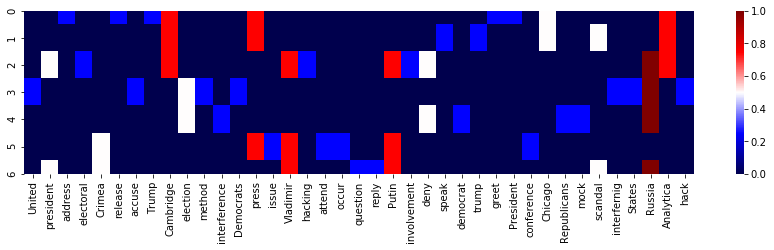

In [115]:
#graphing

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 3))
sns.heatmap(df / df.max().max(), cmap="seismic", annot=False);

#Russia seems to be very important in here...

In [ ]:
# Jaccard similarity does not take in consideration if between two sentences for example
# one word is repeated twice, while tf-idf increases their importance if it is repeated more
# times